In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# CSV 파일 로드
data = pd.read_csv('/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/diabetes.csv')

# 레이블 분리
labels = data['Outcome'].values  # CSV에서 'label' 컬럼이 있다고 가정

# 이미지 데이터를 더미로 생성 (이미지가 없다고 가정하고 무작위로 생성)
num_samples = len(labels)
image_height, image_width = 224, 224  # CNN 입력 크기 (VGG16 모델의 기본 크기)
X_dummy = np.random.rand(num_samples, image_height, image_width, 3)  # 랜덤 이미지 데이터 생성

# 데이터셋을 훈련 세트와 검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X_dummy, labels, test_size=0.2, random_state=42)


In [2]:
# 간단한 CNN 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # 이진 분류

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 모델 저장
model.save('cnn_diabetes_model.h5')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 994ms/step - accuracy: 0.6121 - loss: 1.9314 - val_accuracy: 0.6429 - val_loss: 0.6854
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 925ms/step - accuracy: 0.6639 - loss: 0.6705 - val_accuracy: 0.6429 - val_loss: 0.6622
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6835 - loss: 0.6549 - val_accuracy: 0.6429 - val_loss: 0.6524
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6500 - loss: 0.6575 - val_accuracy: 0.6429 - val_loss: 0.6580
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6189 - loss: 0.6642 - val_accuracy: 0.6429 - val_loss: 0.6844
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6226 - loss: 0.7112 - val_accuracy: 0.6429 - val_loss: 0.6680
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6396 - loss: 0.6637 - val_accuracy: 0.6429 - val_loss: 0.6525
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6699 - loss: 0.6342 - val_accuracy: 0.6429 - val

In [3]:
# VGG16 모델 로드 (최상위 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# 베이스 모델의 모든 층을 동결
for layer in base_model.layers:
    layer.trainable = False

# 새로운 모델 생성
fine_tune_model = models.Sequential()
fine_tune_model.add(base_model)
fine_tune_model.add(layers.Flatten())
fine_tune_model.add(layers.Dense(512, activation='relu'))
fine_tune_model.add(layers.Dropout(0.5))
fine_tune_model.add(layers.Dense(1, activation='sigmoid'))  # 이진 분류

# 모델 컴파일
fine_tune_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
# 베이스 모델의 일부 레이어를 동결 해제
for layer in base_model.layers[-4:]:
    layer.trainable = True

# 미세 조정을 위한 컴파일 (학습률 낮추기)
fine_tune_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                         loss='binary_crossentropy', 
                         metrics=['accuracy'])

# 미세 조정 학습
fine_tune_history = fine_tune_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32
)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 171s 9s/step - accuracy: 0.5574 - loss: 0.7525 - val_accuracy: 0.6429 - val_loss: 0.6567
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.6350 - loss: 0.6932 - val_accuracy: 0.6429 - val_loss: 0.6500
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 170s 9s/step - accuracy: 0.5866 - loss: 0.7002 - val_accuracy: 0.6429 - val_loss: 0.6547
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 180s 9s/step - accuracy: 0.6649 - loss: 0.6464 - val_accuracy: 0.6429 - val_loss: 0.6675
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 172s 9s/step - accuracy: 0.6196 - loss: 0.6657 - val_accuracy: 0.6429 - val_loss: 0.6500


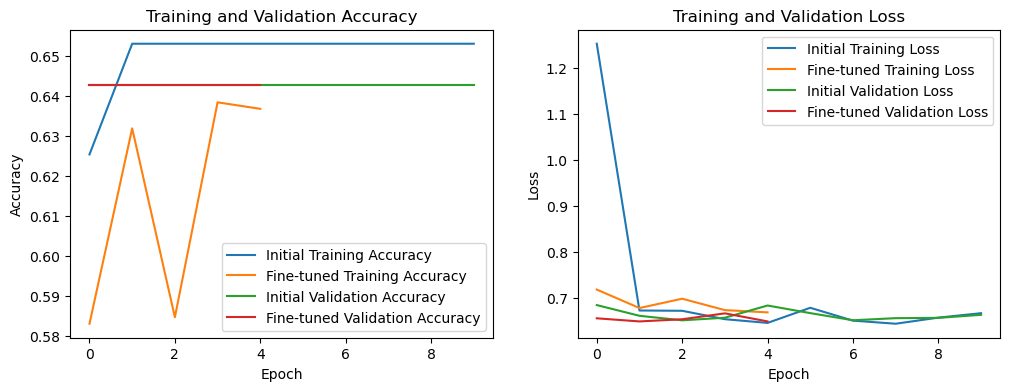

In [5]:
# 정확도 및 손실 시각화
plt.figure(figsize=(12, 4))

# 학습 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Initial Training Accuracy')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-tuned Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Validation Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 학습 손실
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Initial Training Loss')
plt.plot(fine_tune_history.history['loss'], label='Fine-tuned Training Loss')
plt.plot(history.history['val_loss'], label='Initial Validation Loss')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-tuned Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
